**多层感知机**

@ Follow: "动手学深度学习-第四章 多层感知机"

In [11]:
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt

# 基本概念
- 多层感知机(Multilayer Perceptron, MLP)是最简单的深度神经网络
- MLP的架构：将许多全连接层堆叠在一起，每一层都输出到其上面的层，直到生成最后的输出
- 在网络中加入一个或多个隐藏层来突破线性模型的限制，使其能够处理更普遍的函数关系
- 直接添加隐藏层相当于对仿射函数做仿射变换，结果还是仿射函数，还是线性模型。因此对仿射变换之后的每个隐藏单元应用非线性的激活函数，使MLP不再退化成线性模型。
- 更深，而不是更广的网络，可以更容易地逼近许多函数

# 常见的激活函数

## 修正线性单元(Recified Linear Unit, ReLU)
- 函数: $\rm ReLU(x) = max(x, 0)$, 即元素和0中的最大值，保留正元素，丢弃所有负元素
- 使用ReLU的原因是它的求导表现特别好: 要么参数消失, 要么参数通过
- 一个ReLU的变体, 参数化ReLU (parameterized ReLU, pReLU): $\rm pReLU(x) = max(0, x) + \alpha min(0, x)$

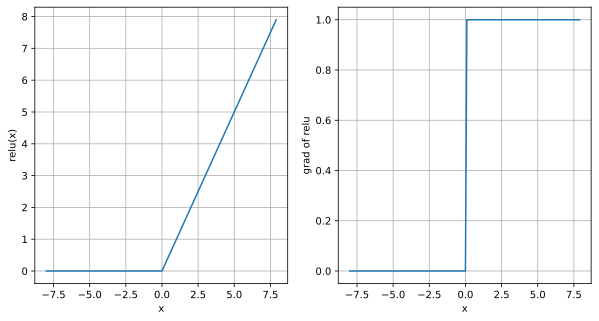

In [14]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
y.backward(torch.ones_like(x), retain_graph=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x.detach().numpy(), y.detach().numpy())
axes[0].set_xlabel('x')
axes[0].set_ylabel('relu(x)')
axes[0].grid()

axes[1].plot(x.detach().numpy(), x.grad.numpy())
axes[1].set_xlabel('x')
axes[1].set_ylabel('grad of relu')
axes[1].grid()

## Sigmoid函数
- Sigmoid函数也称挤压函数: 它将任意数值压缩到(0, 1)上的某个值
- 函数: $\rm sigmoid(x) = \frac{1}{1 + exp(-x)}$
- Sigmoid函数在隐藏层中较少使用, 大部分时候被更简单的ReLU所取代
- Sigmoid函数的导数: $\rm \frac{d}{dx} sigmoid(x) = sigmoid(x)(1 - sigmoid(x))$

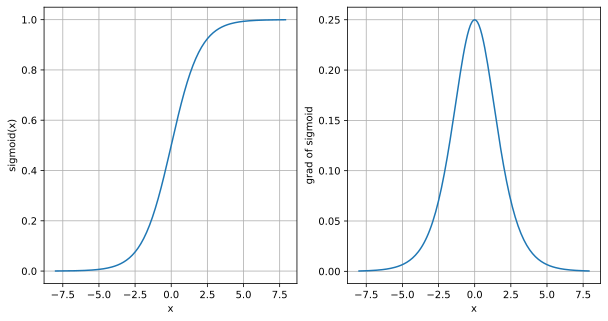

In [15]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x), retain_graph=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x.detach().numpy(), y.detach().numpy())
axes[0].set_xlabel('x')
axes[0].set_ylabel('sigmoid(x)')
axes[0].grid()

axes[1].plot(x.detach().numpy(), x.grad.numpy())
axes[1].set_xlabel('x')
axes[1].set_ylabel('grad of sigmoid')
axes[1].grid()

## 双曲正切函数(tanh)
- 类似sigmoid函数, 能将任意数值压缩到(-1, 1)区间
- 函数: $\rm tanh(x) = \frac{1-exp(-2x)}{1+exp(-2x)}$
- 导数: $\rm \frac{d}{dx} tanh(x) = 1 - tanh^2(x)$

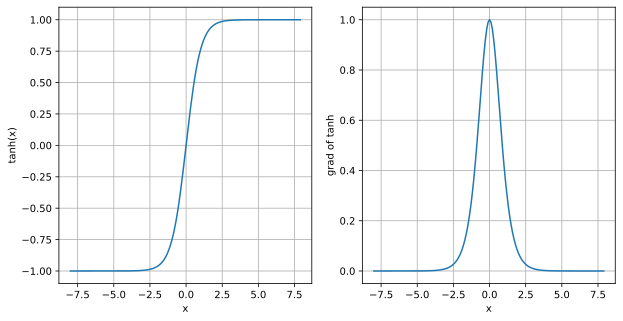

In [16]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.tanh(x)
y.backward(torch.ones_like(x), retain_graph=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x.detach().numpy(), y.detach().numpy())
axes[0].set_xlabel('x')
axes[0].set_ylabel('tanh(x)')
axes[0].grid()

axes[1].plot(x.detach().numpy(), x.grad.numpy())
axes[1].set_xlabel('x')
axes[1].set_ylabel('grad of tanh')
axes[1].grid()